# Cluster Analysis

Unsupervised learning 

segment the data into a set of homogeneous clusters of records

Two popular clustering approaches
 * Hierarchical clustering
     - Agglomerative: begins with n clusters and sequentially merge similar clusters until a single cluster is obtained
     - Divisive: opposite of Agglomerative
 * K-means clustering

Both methods need
* Distance between records
* Distance between clusters

Normalize data before clustering

## Measuring distane between records
possible options
- sklearn.metrics.pairwise
- scipy.spatial.distance.pdist

`from sklearn.metrics import pairwise`

`d= pairwise.pairwise_distances(df, metric='euclidean')`

Other options for metric:
* 'cityblock'
* 'euclidean'
* 'l1' and 'l2'
* 'manhattan'


`from scipy.spatial.distance import pdist`

`Y = pdist(X,metric='euclidean')`

Other options for metric:
- pdist(X, 'minkowski', p=2)
- pdist(X, 'cityblock')
- pdist(X, 'chebyshev')  $max_i|u_i-v_i|$
- ...

## Measuring distane between clusters
* Minimum Distance: `single`
* Maximum Distance: `complete`
* Avg Distance: `average`
* Centroid Distance: `centroid`
* ward: `ward`
* ...


##  Hierarchical/agglomerative clustering
* scipy.cluster.hierarchy.linkage
* sklearn.cluster.AgglomerativeClustering


#### scipy.cluster.hierarchy.linkage

scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

Returns $(n-1) \times 4$ matrix `Z`: 

     - Z[i,0] and Z[i,1]: members of the culster `n+i`
     - Z[i,2]: distance between  clusters Z[i,0] and Z[i,1]
     - Z[i,3]:  the number of original observations in the newly formed cluster.

* y: 1-D condensed distance matrix or 2-D array of records
* method: distance between clusters u and v: 
    - single
    - complete 
    - average 
    - centroid
    - ...

to plot hierarchy tree, use `scipy.cluster.hierarchy.dendrogram`

#### Example 

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
X

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [32]:
Z = linkage(X, 'single')
Z

array([[ 2.,  7.,  0.,  2.],
       [ 5.,  6.,  0.,  2.],
       [ 0.,  4.,  1.,  2.],
       [ 8., 10.,  1.,  4.],
       [ 1.,  9.,  1.,  3.],
       [ 3., 11.,  2.,  5.],
       [12., 13.,  4.,  8.]])

How to interpert Z?

In Z output, each row identifies a link between objects or clusters. The first two columns identify the objects that have been linked. The third column contains the distance between these objects, and the fourth column represents the number of objects in the cluster.

In [21]:
# hight/distance
Z[0,2]

0.0

In [ ]:
array([[ 2.,  7.,  0.,  2.],#==> x[2] & x[7] is linked forming cluster x[8] ={x[2],x[7]}
       [ 5.,  6.,  0.,  2.],#==>  x[9]
       [ 0.,  4.,  1.,  2.],#==> x[10]={x[0],x[4]}
       [ 8., 10.,  1.,  4.],#==> x[11]={x[0],x[4],x[2],x[7]}
       [ 1.,  9.,  1.,  3.],#==> x[12]
       [ 3., 11.,  2.,  5.],#==> x[13]
       [12., 13.,  4.,  8.]])#==> x[14]

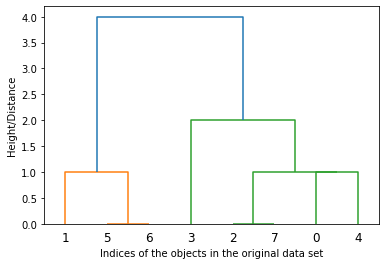

In [36]:
dn = dendrogram(Z)
plt.xlabel('Indices of the objects in the original data set')
plt.ylabel('Height/Distance')
plt.show()


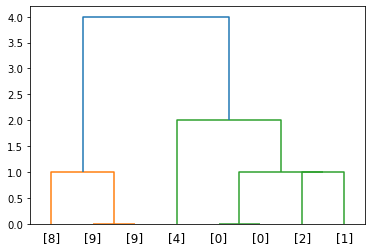

In [6]:
dn = dendrogram(Z,labels=X)
plt.show()

#### Verifying Dissimilarity:
the height between two objects is knowen as the `cophenetic distance` between the two objects. Comparing cophenetic distance with the original distance gives insight on how well clusters are created by the `linkage` function.

scipy.cluster.hierarchy.cophenet(Z,Y)

In [35]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
Y = pdist(X,metric='euclidean')
a,b =cophenet(Z,Y)
a

0.9205298676207505

#### Verifying Consistency:

`Inconsistency coefficient` for each link of the hierarchical cluster Z:

It characterizes each link in a cluster tree by comparing its length with the average length of other links at the same level of the hierarchy. The higher the value of this coefficient, the less similar the objects connected by the link.

scipy.cluster.hierarchy.inconsistent(Z,d=2):

returns $(n-1) \times 4$ matrix `R` where where the i’th row contains the link statistics for the non-singleton cluster i.

link statistics are computed over the link heights for links $d$ levels below the cluster i.


`R` (the output of the `inconsistent(Z)`):

|  Column | Description |
| --- | --- |
|1 | Mean of the heights of all the links included in the calculation |
| 2 | Standard deviation of all the links included in the calculation |
| 3 | Number of links included in the calculation |
| 4 | Inconsistency coefficient |

The inconsistency value is calculated as

$$R[i,3]=\frac{Z[i,2]-R[i,0]}{R[i,1]}$$

In [14]:
from scipy.cluster.hierarchy import inconsistent
inconsistent(Z)

array([[0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 1.        , 0.        ],
       [0.66666667, 0.57735027, 3.        , 0.57735027],
       [0.5       , 0.70710678, 2.        , 0.70710678],
       [1.5       , 0.70710678, 2.        , 0.70710678],
       [2.33333333, 1.52752523, 3.        , 1.09108945]])

i’th row of the `inconsistent(Z)` contains the link statistics for the non-singleton cluster i. 
For example, there are 3 links included in the calculation of the fourth row:

|     Link       | Height/Distance |
| --- | --- |
| x[2] - x[7]    |   Z[0,2] = 0    |
| x[0] - x[4]    |   Z[2,2] = 1    |
| x[8] - x[10]   |   Z[3,2] = 1    |

the mean of 0,1,1 is R[3,0]=0.66666667 and the standard deviation is R[3,1]= 0.57735027 (this is normalized, i.e. divided by `N-1`).

In [27]:
import numpy as np
np.mean([0,1,1])
np.std([0,1,1],ddof=1)

0.5773502691896258

The inconsistency value is calculated as
$$R[i,3]=\frac{Z[i,2]-R[i,0]}{R[i,1]}= \frac{1-0.6667}{0.57735}=0.57735$$

For a cluster A, all the links below the cluster A, up to depth d, are considered to compute mean and std. In this example, d=2 means we look at the link that created x[11] (depth 1), and the links below x[8] and x[10] (depth 2).

**To find membership to each cluster:**
Form flat clusters from the hierarchical clustering defined by the given linkage matrix.

scipy.cluster.hierarchy.fcluster(Z, t, criterion='inconsistent')

* Z: linkage
* t: scalar; depends on criterion
    - if criterion= 'maxclust' or 'maxclust_monocrit' : max number of clusters requested
    - if criterion= 'inconsistent', 'distance' or 'monocrit' : this is the threshold to apply when forming flat clusters.
* criterion
    - inconsistent: If a cluster node and all its descendants have an inconsistent value less than or equal to t, then all its leaf descendants belong to the same flat cluster. When no non-singleton cluster meets this criterion, every node is assigned to its own cluster. (Default)
    - distance:  observations in each cluster have no greater a distance than t
    - maxclust: Finds a minimum threshold `r` so that the distance between any two observations in the same cluster is no more than r and no more than t.
    - monocrit:
    - maxclust_monocrit:

In [35]:
from scipy.cluster.hierarchy import fcluster
memb = fcluster(linkage(X, 'single'), 2, criterion='maxclust')
memb

array([2, 1, 2, 2, 2, 1, 1, 2], dtype=int32)

### Example

In [65]:
import dmba
import pandas as pd
df = dmba.load_data('Utilities.csv')
df.set_index('Company', inplace=True)
df.head(5)

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [72]:
df_norm = (df - df.mean())/df.std()
df_norm.head(5)

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.293158,-0.684639,-0.417122,-0.577715,-0.526228,0.045903,-0.714629,-0.853675
Boston,-1.214511,-0.194454,0.821002,0.206836,-0.333812,-1.077764,0.792048,0.813297
Central,1.712141,2.078224,-1.339646,-0.891536,0.051019,0.083931,-0.714629,-0.080431
Commonwealth,-0.509947,0.206607,-0.004414,-0.219063,-0.943128,-0.701706,1.328020,-0.724202
NY,2.037324,-0.862888,0.578233,-1.295019,-0.718643,-1.581428,0.214389,1.692638


In [91]:
from sklearn.metrics import pairwise
d = pairwise.pairwise_distances(df_norm[['Sales', 'Fuel_Cost']], 
                                metric='euclidean')
pd.DataFrame(d, columns=df.index, index=df.index).head(5)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,0.521491,2.761745,1.252350
Boston,2.010329,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255,1.100595,1.479261
Central,0.774179,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,0.838967,2.034824,0.510365
Commonwealth,0.758738,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,0.243408,2.547116,1.502093
NY,3.021907,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786,0.952507,2.328691


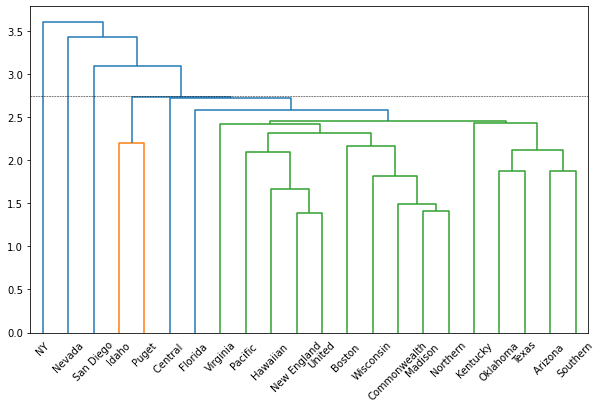

In [92]:
Z = linkage(df_norm, method='single')
fig = plt.figure(figsize=(10, 6))
dendrogram(Z,labels=df_norm.index)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [93]:
from scipy.cluster.hierarchy import inconsistent
inconsistent(Z)

array([[1.38412377, 0.        , 1.        , 0.        ],
       [1.40703194, 0.        , 1.        , 0.        ],
       [1.44922941, 0.05967625, 2.        , 0.70710678],
       [1.5220853 , 0.19510706, 2.        , 0.70710678],
       [1.65394587, 0.22983654, 2.        , 0.70710678],
       [1.87605148, 0.        , 1.        , 0.        ],
       [1.87724763, 0.        , 1.        , 0.        ],
       [1.87859857, 0.30907884, 2.        , 0.70710678],
       [1.95559625, 0.13674099, 3.        , 1.15468949],
       [1.99033872, 0.24589481, 2.        , 0.70710678],
       [2.20145718, 0.        , 1.        , 0.        ],
       [2.19327139, 0.11347615, 3.        , 1.1031381 ],
       [2.37018375, 0.07316079, 2.        , 0.70710678],
       [2.27101133, 0.22276931, 2.        , 0.70710678],
       [2.43412817, 0.01577227, 3.        , 1.12901192],
       [2.51657171, 0.09140975, 2.        , 0.70710678],
       [2.6525811 , 0.10093657, 2.        , 0.70710678],
       [2.55427262, 0.30562115,

In [89]:
from scipy.cluster.hierarchy import cophenet
Y = pdist(df_norm[['Sales', 'Fuel_Cost']],metric='euclidean')
c , distance_matrix= cophenet(Z,Y)
c

0.6023456320097699

In [82]:
from scipy.cluster.hierarchy import fcluster
memb = fcluster(linkage(df_norm, 'single'), 6, criterion='maxclust')
memb

array([2, 2, 3, 2, 6, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2],
      dtype=int32)

In [85]:
memb=pd.Series(memb, index=df_norm.index)
memb.sort_values()

Company
Puget           1
Idaho           1
Arizona         2
Wisconsin       2
Texas           2
Southern        2
Pacific         2
Oklahoma        2
Northern        2
New England     2
Virginia        2
Madison         2
Kentucky        2
Hawaiian        2
Florida         2
Commonwealth    2
Boston          2
United          2
Central         3
San Diego       4
Nevada          5
NY              6
dtype: int32

In [86]:
from scipy.cluster.hierarchy import fcluster
memb = fcluster(linkage(df_norm, 'average'), 6, criterion='maxclust')
memb=pd.Series(memb, index=df_norm.index)
memb.sort_values()

Company
Nevada          1
Puget           1
Idaho           1
Pacific         2
Hawaiian        2
New England     2
United          2
San Diego       3
Wisconsin       4
Northern        4
Virginia        4
Commonwealth    4
Boston          4
Madison         4
Kentucky        5
Florida         5
Oklahoma        5
Central         5
Southern        5
Texas           5
Arizona         5
NY              6
dtype: int32

### klearn.cluster.AgglomerativeClustering
sklearn.cluster.AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
**Arguments:**

- affinity: {“euclidean”, “l1”, “l2”, “manhattan”}:default=’euclidean’ Metric used to compute the linkage. 
- linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward
    Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
   - ‘ward’ minimizes the variance of the clusters being merged.
   - ‘average’ uses the average of the distances of each observation of the two sets.
   - ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
   - ‘single’ uses the minimum of the distances between all observations of the two sets.

**Attributes:**

 - n_clusters_: The number of clusters found by the algorithm
 - labels_: Cluster labels for each point.
 - n_leaves_: Number of leaves in the hierarchical tree
 - children_: The children of each non-leaf node.
 - distances_: Distances between nodes of `children_`

**Methods:**

 - fit(X[, y]): Fit the hierarchical clustering from features, or distance matrix.
 - fit_predict(X[, y]): Fit and return the result of each sample's clustering assignment.
 

#### Example 1

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])
print(X)
clustering = AgglomerativeClustering(linkage="single",n_clusters=3).fit(X)
print(clustering.labels_)

#### Example 2. Utilities

In [20]:
###### import dmba
import pandas as pd
df = dmba.load_data('Utilities.csv')
df.set_index('Company', inplace=True)
df_norm = (df - df.mean())/df.std()
df_norm.head(5)
clustering = AgglomerativeClustering(linkage='single', n_clusters=6)
clustering.fit(df_norm)
clustering.labels_

array([0, 0, 5, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0],
      dtype=int64)

In [21]:
memb=pd.Series(clustering.labels_, index=df_norm.index)
memb.sort_values()

Company
Arizona         0
Wisconsin       0
Texas           0
Southern        0
Pacific         0
Oklahoma        0
Northern        0
New England     0
United          0
Virginia        0
Kentucky        0
Hawaiian        0
Florida         0
Commonwealth    0
Boston          0
Madison         0
Idaho           1
Puget           1
Nevada          2
NY              3
San Diego       4
Central         5
dtype: int64

##  K-Mean clustering
Partitions data into k mutually exclusive clusters of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares, $\sum_{i=0}^{n} min_{\mu_j \in C}(||x_i-\mu_j||^2)$ where $\mu_j$ is the centriod of the cluster j.

**inertia**: as a measure of how internally coherent clusters are

more suitable than hierarchical clustering for large amounts of data

K-means is often referred to as `Lloyd’s algorithm` and has three steps: 
- 1. hooses the initial centroid
- 2. assigns each sample to its nearest centroid
- 3. creates new centroids by taking the mean value of all of the samples assigned to each previous centroid




###  K-Mean clustering implementations
* sklearn.cluster.KMeans(n_clusters=8,init='k-mean++', max_iter=300, algorithm='lloyd',random_state=0)
    - init:{‘k-means++’, ‘random’}
        * ‘k-means++’ : selects initial cluster centers in a smart way to speed up convergence
        * ‘random’: choose at random from data for the initial centroids
    - algorithm:{“lloyd”, “elkan”}, default=”lloyd”
        * lloyd: EM-style algorithm
        * elkan: efficient on datasets with well-defined clusters; more memory intensive
    - **Attributes**:
        * cluster_centers_: Coordinates of cluster centers.
        * labels_: Labels of each point
        * inertia_: Sum of squared distances of samples to their closest cluster center
    - **Methods**:
        * fit(X): Compute k-means clustering.
        * predict(X): Predict the closest cluster each sample in X belongs to.
        * transform(X): distances of X to the cluster centers
        * fit_predict(X): 
        * fit_transform(X):
* scipy.cluster.vq.kmeans(data, k_or_guess, iter=20,)
    - codebook: A k by N array of k centroids
    - distortion:The mean Euclidean distance between the observations passed and the centroids generated.
* scipy.cluster.vq.kmeans2(data, k, iter=10,minit)
   * minit: Method for initialization
       - random’: k centroids from a Gaussian with mean and variance estimated from the data.
       - ‘points’:  choose k observations (rows) at random from data
       - ‘++’:  choose k observations accordingly to the kmeans++ method
   - **Attributes** 
    - centroid
    - label
   

### Example of K-Mean using sklearn

In [169]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
df_norm = df.apply(preprocessing.scale, axis=0)
kmeans= KMeans(n_clusters=6, random_state=0).fit(df_norm)

**Members of each cluster**

In [170]:
labels=kmeans.labels_
labels

array([2, 1, 2, 0, 3, 2, 1, 5, 2, 0, 4, 1, 0, 2, 1, 5, 1, 2, 2, 0, 1, 0])

In [171]:
memb=pd.Series(labels, index=df_norm.index)
memb.sort_values()

Company
Virginia        0
Wisconsin       0
Commonwealth    0
Madison         0
Northern        0
Boston          1
Hawaiian        1
San Diego       1
Pacific         1
United          1
New England     1
Texas           2
Southern        2
Arizona         2
Kentucky        2
Florida         2
Central         2
Oklahoma        2
NY              3
Nevada          4
Puget           5
Idaho           5
dtype: int32

**Centriod of each cluster**

In [102]:
centroids = pd.DataFrame(kmeans.cluster_centers_,
                        columns=df_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

   Fixed_charge    RoR   Cost  Load_factor  Demand_growth  Sales  Nuclear  \
0        -0.012  0.339  0.224       -0.366          0.170 -0.411    1.602   
1        -0.633 -0.640  0.207        1.175          0.058 -0.758   -0.381   
2         0.516  0.798 -1.009       -0.345         -0.501  0.360   -0.536   
3         2.085 -0.883  0.592       -1.325         -0.736 -1.619    0.219   
4        -2.020 -1.476  0.120       -1.257          1.070  2.458   -0.731   
5         0.088 -0.541  1.996       -0.110          0.988  1.621   -0.731   

   Fuel_Cost  
0     -0.609  
1      1.204  
2     -0.420  
3      1.732  
4     -0.616  
5     -1.175  


In [106]:
pd.set_option('precision', 3)
df_norm.groupby(kmeans.labels_).mean()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,-0.012,0.339,0.224,-0.366,0.170,-0.411,1.602,-0.609
1,-0.633,-0.640,0.207,1.175,0.058,-0.758,-0.381,1.204
2,0.516,0.798,-1.009,-0.345,-0.501,0.360,-0.536,-0.420
3,2.085,-0.883,0.592,-1.325,-0.736,-1.619,0.219,1.732
4,-2.020,-1.476,0.120,-1.257,1.070,2.458,-0.731,-0.616
5,0.088,-0.541,1.996,-0.110,0.988,1.621,-0.731,-1.175


In [107]:
pd.set_option('precision', 6)

**Distance of each data point from each cluster**

In [149]:
distances = kmeans.transform(df_norm)
distances[0]

array([2.80463747, 3.01304154, 1.91183392, 4.22015724, 3.57331973,
       3.34302792])

In [120]:
kmeans.inertia_

33.611078163255705

**Distance of each cluster from other clusters**

In [109]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, 
                                               metric='euclidean')))

          0         1         2         3         4         5
0  0.000000  3.327706  2.767756  4.076778  4.756091  3.814743
1  3.327706  0.000000  3.376575  3.982534  4.831882  4.205250
2  2.767756  3.376575  0.000000  4.240989  4.544657  3.933837
3  4.076778  3.982534  4.240989  0.000000  6.613030  5.511431
4  4.756091  4.831882  4.544657  6.613030  0.000000  3.342656
5  3.814743  4.205250  3.933837  5.511431  3.342656  0.000000


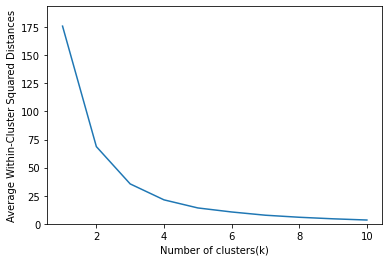

In [119]:
import warnings
warnings.filterwarnings("ignore")
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 11), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

#### using scipy kmeans2

In [161]:
from numpy import array
from scipy.cluster.vq import kmeans2, whiten
whitened = whiten(df)
centroid, label= kmeans2(whitened,k=6)

In [165]:
whitened

array([[ 5.88010245,  4.19620902,  3.75208458, 12.48113209,  0.52518305,
         2.6170838 ,  0.        ,  1.15587254],
       [ 4.93706715,  4.69792966,  5.01934494, 13.2841461 ,  0.7221267 ,
         1.46697393,  1.54213311,  2.86207294],
       [ 7.93259104,  7.02408901,  2.80785138, 12.15992648,  1.11601399,
         2.65600705,  0.        ,  1.94731394],
       [ 5.65821179,  5.10842837,  4.1745047 , 12.84822421,  0.09847182,
         1.8518816 ,  2.09071801,  1.28839296],
       [ 8.26542703,  4.01376515,  4.77086252, 11.74694785,  0.32823941,
         0.95145715,  0.9508805 ,  3.76210745],
       [ 7.32239173,  6.15748063,  2.75815489, 13.76595451, -0.7221267 ,
         3.20814051,  1.37146225,  2.28413667],
       [ 6.76766508,  5.56453805,  4.3484424 , 15.50964208,  0.7221267 ,
         2.2033441 ,  0.        ,  3.04060739],
       [ 6.10199311,  4.19620902,  6.08781936, 13.07765679,  1.08319005,
         3.77180679,  0.        ,  0.56873347],
       [ 7.43333706,  5.92942579

In [164]:
centroid

array([[ 6.58044484,  5.74128055,  3.5284504 , 12.60158419,  0.54980101,
         2.5539056 ,  1.42708267,  1.3976763 ],
       [ 4.16044984,  3.42082257,  4.29874591, 11.81577762,  2.13355616,
         5.02859519,  0.        ,  1.41355114],
       [ 6.40709276,  5.02480827,  4.7253074 , 13.46386829,  1.43331209,
         3.09165909,  0.        ,  1.58871123],
       [ 5.63323041,  3.40591691,  6.14325423, 12.30673292,  1.73193151,
         2.56709606,  2.25388868,  1.238939  ],
       [ 4.82220508,  3.24456369,  3.05402768, 12.07653652,  1.46105836,
         1.15775555,  2.13851243,  3.84873634],
       [ 5.81670512,  4.03331271,  4.43718612, 13.45458173,  1.18166187,
         1.7903458 ,  0.66788035,  3.21782716]])

In [162]:
label

array([2, 5, 0, 0, 5, 0, 2, 2, 2, 0, 1, 5, 0, 0, 5, 2, 5, 2, 0, 0, 5, 5])

In [166]:
memb2=pd.Series(label, index=df_norm.index)
memb.sort_values()

Company
Wisconsin       0
Central         0
Commonwealth    0
Texas           0
Florida         0
Oklahoma        0
Madison         0
Northern        0
Nevada          1
Southern        2
Puget           2
Arizona         2
Kentucky        2
Idaho           2
Hawaiian        2
United          5
Pacific         5
San Diego       5
NY              5
Boston          5
New England     5
Virginia        5
dtype: int32

## Clustering performance evaluation
**If ground truth class assignments of the samples in known:**
- Rand Index: $\frac{Number of agreeing pairs}{Number of pairs}$ 

sklearn.metrics.rand_score(labels_true, labels_pred)
- homogeneity_score: (homogeneity) each cluster contains only members of a single class.

sklearn.metrics.homogeneity_score(labels_true, labels_pred)
- completeness_score: all members of a given class are assigned to the same cluster

sklearn.metrics.completeness_score(labels_true, labels_pred)

* Fowlkes-Mallows scores: $FMI= \frac{TP}{\sqrt{(TP+FP)(TP+FN)}}$

sklearn.metrics.fowlkes_mallows_score(labels_true, labels_pred)

**If ground truth class assignments of the samples in known:**
- Silhouette Coefficient: $s= \frac{b-a}{max(a,b)}$ where 

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

s=-1: incrorrect clustering and s = 1: highly dense clustering. Scores around zero indicate overlapping clusters.

sklearn.metrics.silhouette_score(df, kmeans_model.labels_, metric='euclidean')


-  Variance Ratio Criterion (Calinski-Harabasz Index): higher score, better model. 

 The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):
 
sklearn.metrics.calinski_harabasz_score(df, kmeans_model.labels_)

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score,homogeneity_score,fowlkes_mallows_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = StandardScaler().fit_transform(X)
kmeans= KMeans(n_clusters=3)
kmeans.fit(X)
print('Rand Score: ', rand_score(y, kmeans.labels_))
print('homogeneity_score: ', homogeneity_score(y, kmeans.labels_))
print('Fowlkes-Mallows: ', fowlkes_mallows_score(y, kmeans.labels_))

Rand Score:  0.8322147651006712
homogeneity_score:  0.6591265018049008
Fowlkes-Mallows:  0.7452105043132992


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn import preprocessing
df_norm = df.apply(preprocessing.scale, axis=0)
kmeans= KMeans(n_clusters=6, random_state=0).fit(df_norm)
print('silhouette_score: ',silhouette_score(df_norm, kmeans.labels_,
                                            metric='euclidean'))
print('calinski_harabasz_score: ',calinski_harabasz_score(df_norm,
                                                          kmeans.labels_))


silhouette_score:  0.23899253580736135
calinski_harabasz_score:  5.716007628505667
